In [2]:
import numpy as np
from sklearn.model_selection import train_test_split

# Generate 500 samples for each class
n_samples = 500

# Generate feature values for the positive class
X_positive = np.random.normal(loc=0, scale=1, size=n_samples)

# Generate feature values for the negative class
X_negative = np.random.normal(loc=0, scale=1, size=n_samples)

# Combine the feature values
X = np.concatenate([X_positive, X_negative])

# Generate labels for the positive class (1) and the negative class (0)
y = np.concatenate([np.ones(n_samples), np.zeros(n_samples)])

# Shuffle the dataset
indices = np.arange(2*n_samples)
np.random.shuffle(indices)
X = X[indices]
y = y[indices]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

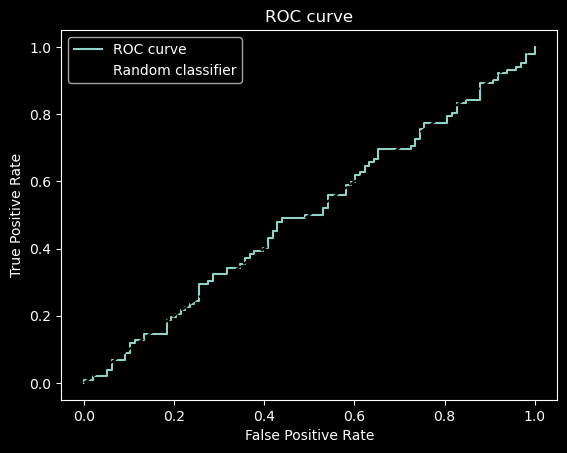

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Train a logistic regression classifier
clf = LogisticRegression(random_state=42)
clf.fit(X_train.reshape(-1, 1), y_train)

# Predict the probabilities of the positive class
y_scores = clf.predict_proba(X_test.reshape(-1, 1))[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()